<a href="https://colab.research.google.com/github/taristadwi/PCVK_SEMESTER-5/blob/main/jobsheet9_taristadwisilvia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAMA:Tarista Dwi Silvia**

# **NIM:2141720014**

# **KELAS:TI-3A**

---



---



1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

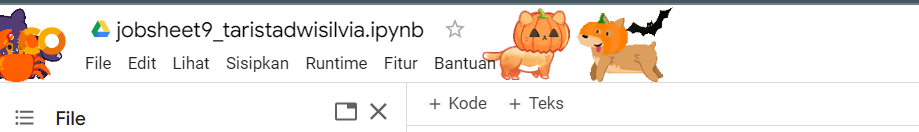

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

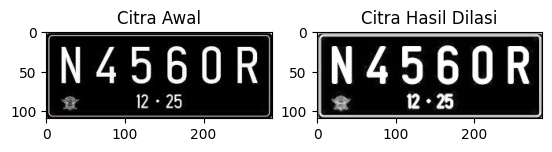

In [ ]:

# Fungsi untuk melakukan dilasi
def dilate(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center = (k_height // 2, k_width // 2)

    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            max_val = 0
            for ky in range(k_height):
                for kx in range(k_width):
                    img_y = y + ky - k_center[0]
                    img_x = x + kx - k_center[1]
                    if img_y >= 0 and img_y < height and img_x >= 0 and img_x < width:
                        if kernel[ky, kx] == 1 and image[img_y, img_x] > max_val:
                            max_val = image[img_y, img_x]
            result[y, x] = max_val

    return result

# Load gambar sumber

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Kernel cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Proses dilasi
dilation = dilate(img_gray, kernel)

#fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

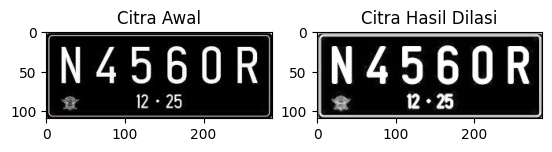

In [6]:
from google.colab.patches import cv2_imshow
import cv2

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kernel cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Lakukan dilasi
dilation = cv2.dilate(img_gray, kernel, iterations=1)

# Menampilkan citra asli dan hasil dilasi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


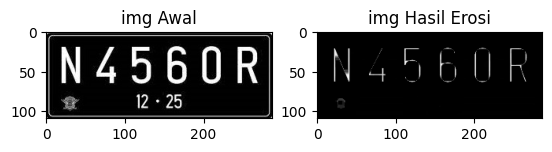

In [7]:
# Fungsi erosi
def erosi(img, se):
    tinggi, lebar = img.shape
    se_tinggi, se_lebar = se.shape
    se_center = (se_tinggi // 2, se_lebar // 2)

    hasil = np.zeros_like(img)

    for y in range(tinggi):
        for x in range(lebar):
            min_val = 255
            for i in range(se_tinggi):
                for j in range(se_lebar):
                    if se[i, j] == 1:
                        img_y = y + i - se_center[0]
                        img_x = x + j - se_center[1]
                        if 0 <= img_y < tinggi and 0 <= img_x < lebar:
                            min_val = min(min_val, img[img_y, img_x])
            hasil[y, x] = min_val

    return hasil

# Baca img
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Erosi (Square 5x5)
se = np.array([[1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1]], dtype=np.uint8)

# Terapkan erosi pada img
hasil_erosi = erosi(img, se)

# Menampilkan img asli dan hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('img Awal')
plt.subplot(122), plt.imshow(hasil_erosi, cmap='gray'), plt.title('img Hasil Erosi')
plt.show()


6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:


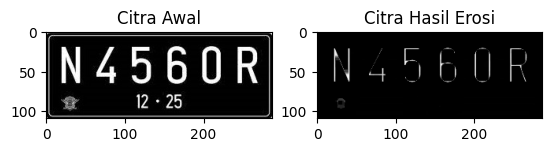

In [8]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Erosi (Square 5x5)
se = np.ones((5, 5), dtype=np.uint8)

# Lakukan erosi
erosion = cv2.erode(img, se, iterations=1)

# Menampilkan citra asli dan hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()


7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:
Operasi Opening Menggunakan tanpa Library Morphology

tanpa menggunakan library

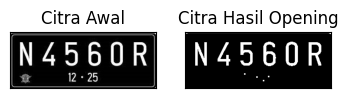

In [9]:
# Baca citra
image_opening = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
reto, thresho = cv2.threshold(image_opening, 127, 255, cv2.THRESH_BINARY)

k = 3
se = np.ones((k, k), np.uint8)

# Lakukan erosi dan dilasi
erosion = erosi(thresho, se)
dilation = dilate(erosion, se)

# Menampilkan citra asli dan hasil opening
plt.subplot(131), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

### Tanpa menggunakan library dengan ukuran kernel square 7x7

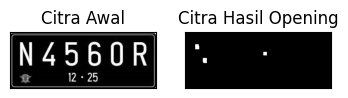

In [10]:
# Baca citra
image_opening = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
reto, thresho = cv2.threshold(image_opening, 127, 255, cv2.THRESH_BINARY)

k = 7
se = np.ones((k, k), np.uint8)

# Lakukan erosi dan dilasi
erosion = erosi(thresho, se)
dilation = dilate(erosion, se)

# Menampilkan citra asli dan hasil opening
plt.subplot(131), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

### Menggunakan Library

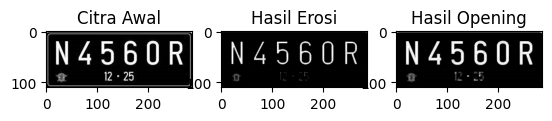

In [11]:
# Baca citra
citra = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3 dalam bentuk array
se = np.ones((3, 3), dtype=np.uint8)

# Lakukan erosi
erosion = erosi(citra, se)

# Lakukan dilasi pada hasil erosi
dilation = dilate(erosion, se)

# Menampilkan citra asli, hasil erosi, dan hasil opening
plt.subplot(131), plt.imshow(citra, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Hasil Erosi')
plt.subplot(133), plt.imshow(dilation, cmap='gray'), plt.title('Hasil Opening')
plt.show()


### Menggunakan library dengan kernel quare 7x7

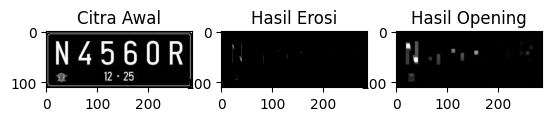

In [12]:
# Baca citra
citra = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3 dalam bentuk array
se = np.ones((7, 7), dtype=np.uint8)

# Lakukan erosi
erosion = erosi(citra, se)

# Lakukan dilasi pada hasil erosi
dilation = dilate(erosion, se)

# Menampilkan citra asli, hasil erosi, dan hasil opening
plt.subplot(131), plt.imshow(citra, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Hasil Erosi')
plt.subplot(133), plt.imshow(dilation, cmap='gray'), plt.title('Hasil Opening')
plt.show()


8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:
operasi closing tanpa library morphology

Menggunakan Library

Kernel 3x3

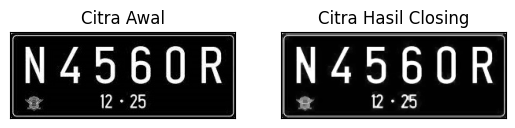

In [13]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Dilasi (Square 3x3)
se = np.ones((3, 3), np.uint8)

# Lakukan closing
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

#### Kernel 7x7 (sesuai jobsheet)

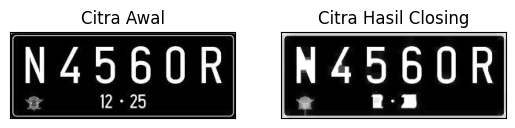

In [14]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Dilasi (Square 3x3)
se = np.ones((7, 7), np.uint8)

# Lakukan closing
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

### Tidak menggunakan library

#### Kernel 3x3

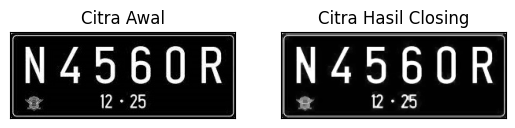

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), np.uint8)

# Lakukan dilasi dan erosi dengan fungsi OpenCV
dilation = cv2.dilate(img, se, iterations=1)
closing = cv2.erode(dilation, se, iterations=1)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()


#### Kernel 7x7

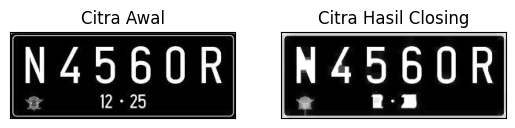

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 7x7
se = np.ones((7, 7), np.uint8)

# Lakukan dilasi dan erosi dengan fungsi OpenCV
dilation = cv2.dilate(img, se, iterations=1)
closing = cv2.erode(dilation, se, iterations=1)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()


9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED=Cross3


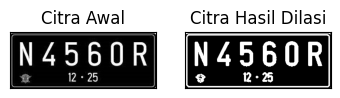

SED = Cross 5


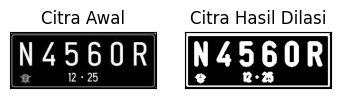

In [22]:
# dilasi cross sed
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product=temp*SED
      imgD[i,j]=np.max(product)
  return imgD

print('SED=Cross3')
img_d=cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
ret,thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD=dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap='gray')
plt.title('Citra Awal'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap='gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]),plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

SED = Circle 3


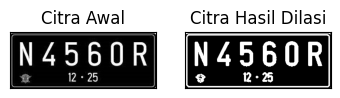

SED = Circle 5


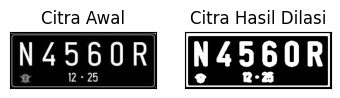

In [23]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:


SE = Rectangle 3x5


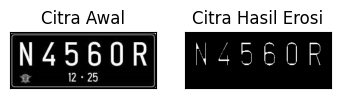

SE = Rectangle 5x7


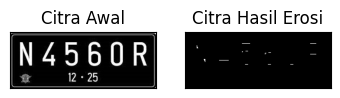

In [24]:
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

SE = Line Vertikal 3


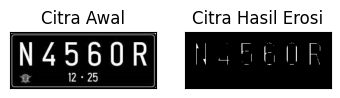

SE = Line Vertikal 5


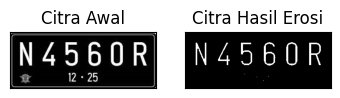

In [25]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product=temp*SE
      imgE[i,j]=np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

# **13 TopHat**

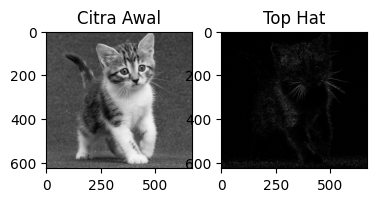

In [26]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat kernel berbentuk Square 5x5
kernel = np.ones((3, 3), np.uint8)

# Lakukan operasi Top Hat
top_hat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Menampilkan citra asli dan hasil Top Hat
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(top_hat, cmap='gray'), plt.title('Top Hat')
plt.show()


# **14 BLACKHAT**

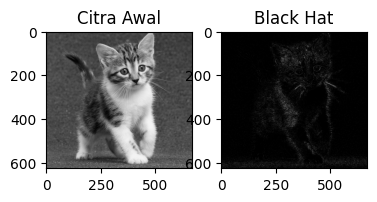

In [27]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat kernel berbentuk Square 5x5
kernel = np.ones((3, 3), np.uint8)

# Lakukan operasi Black Hat pada citra
black_hat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Menampilkan citra asli dan hasil Black Hat
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(black_hat, cmap='gray'), plt.title('Black Hat')
plt.show()


# **15. Skeleton**

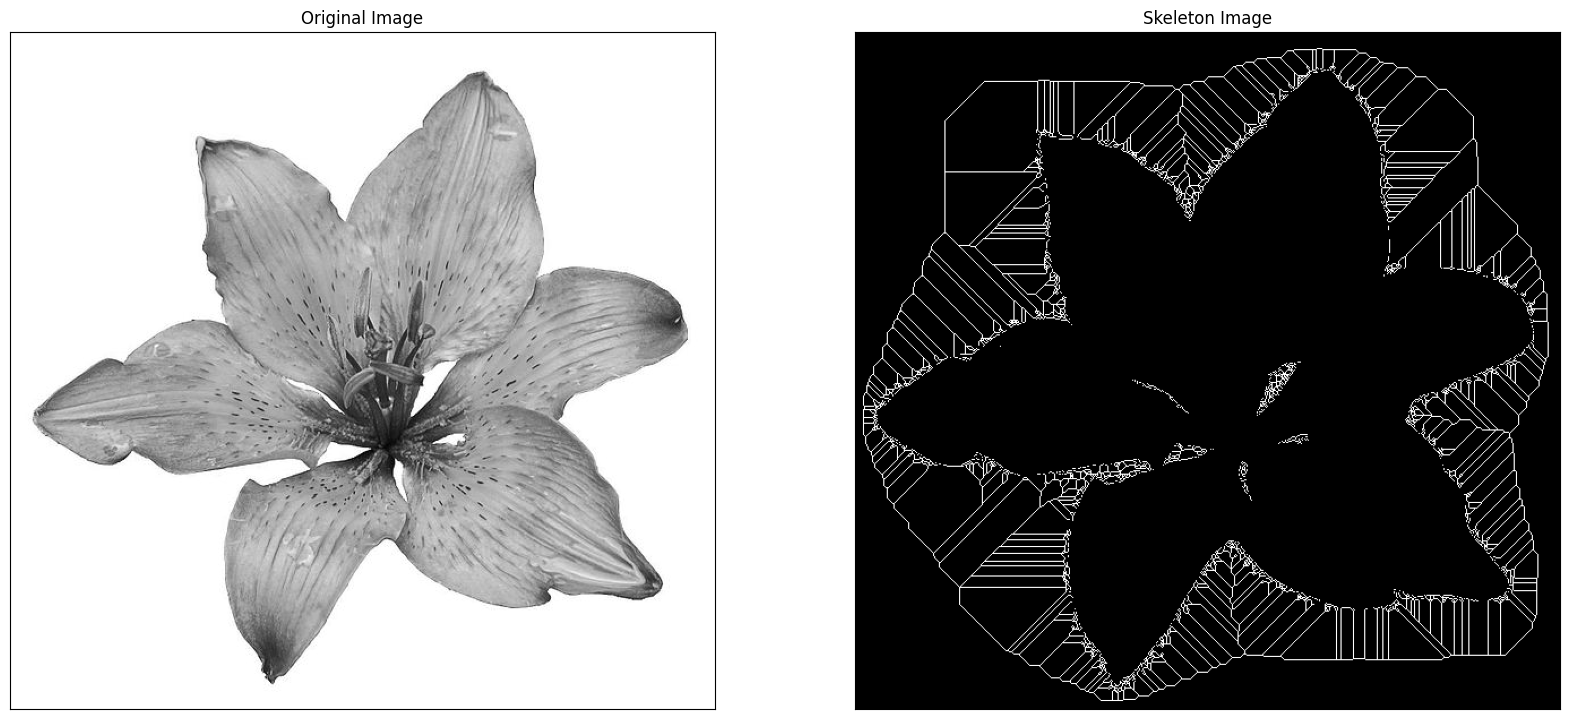

In [28]:
from skimage import io, color,filters, morphology

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg', cv2.IMREAD_GRAYSCALE)

# Binarisasi citra menggunakan Threshold Triangle
binary = img > filters.threshold_triangle(img)

# Konversi nilai True/False ke 1/0
binary_cp = binary.astype(np.uint8)

# Lakukan Skeletonization
skeleton = morphology.skeletonize(binary_cp)

# Menampilkan citra asli dan hasil Skeletonization
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])
plt.show()

# **16. Skeleton Inverse**

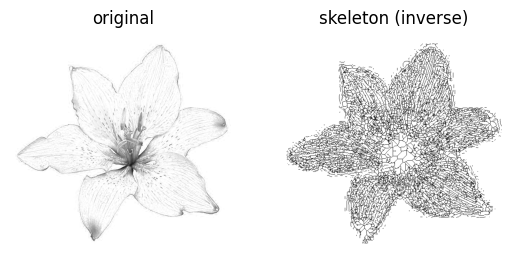

In [29]:
from skimage import io, filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

# **17. Thickening**

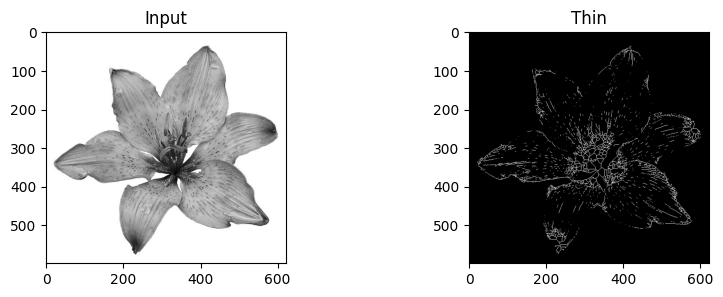

In [30]:
from skimage import io, color, morphology, img_as_float
import matplotlib.pyplot as plt

# Read the image and convert it to grayscale
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))

# Binarize the image
image_binary = image < 0.5

# Perform skeletonization
out_skeletonize = morphology.skeletonize(image_binary)

# Perform thinning (this is optional, you can skip this if you only want skeletonization)
out_thin = morphology.thin(image_binary)

# Display the original image and the thinned image
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')  # You can change 'out_thin' to 'out_skeletonize' if you want skeletonization
ax1.set_title('Thin')  # You can change 'Thin' to 'Skeletonize' if you want skeletonization
plt.show()


# **E. Tugas Praktikum **

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.

# **Closing**

In [36]:
def convert_to_binary(image):
    # Konversi gambar ke dalam citra grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Terapkan fungsi thresholding dengan flag THRESH_OTSU
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

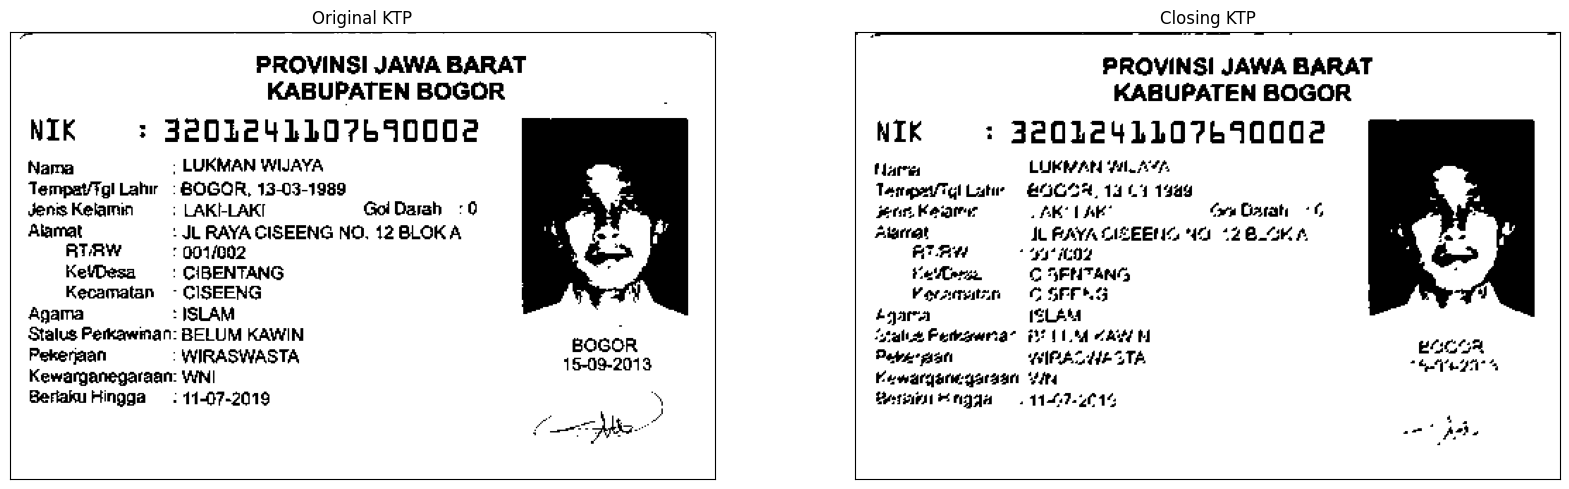

In [41]:
# Membaca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/unnamed.jpg')

# Ubah ke binary
ktp_image = convert_to_binary(ktp_image)

# Closing
kernel = np.array([[1, 1],
                              [1, 0]], dtype = np.uint8)
closs = cv2.morphologyEx(ktp_image,cv2.MORPH_CLOSE, kernel)

# Menampilkan citra KTP
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(X=ktp_image, cmap = 'gray')
plt.title('Original KTP'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(X=closs,cmap = 'gray')
plt.title('Closing KTP'), plt.xticks([]), plt.yticks([])

plt.show()

# **EROSI**

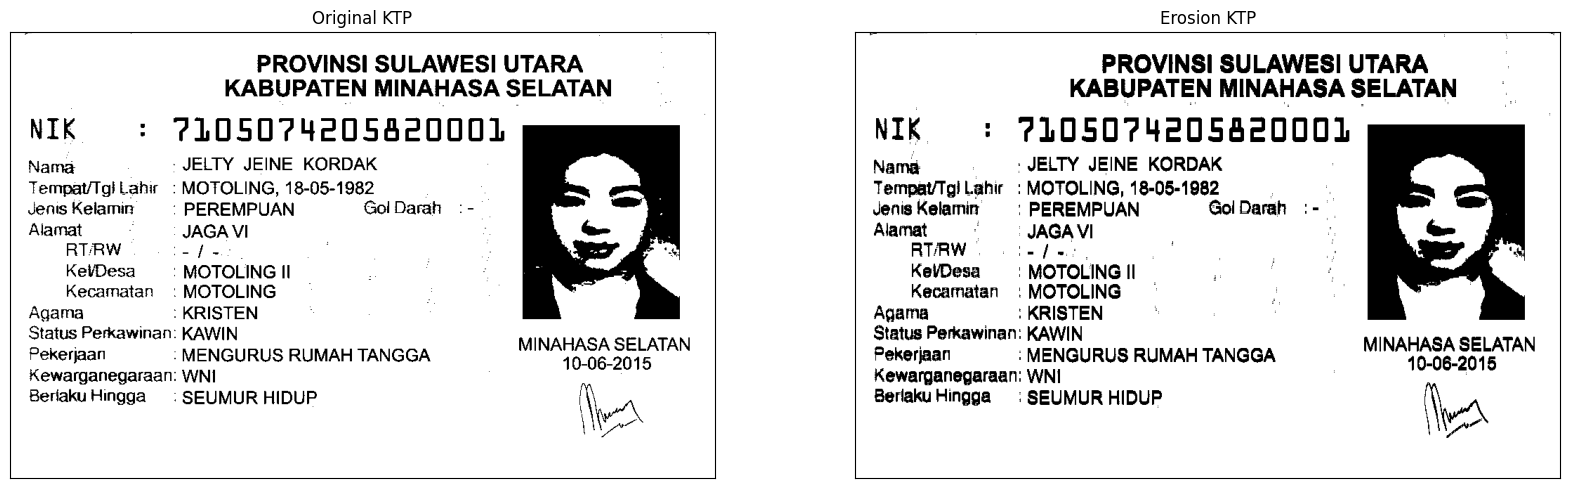

In [47]:
# Membaca citra KTP
ktp_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/katepe.png')

# Ubah ke binary
ktp_image = convert_to_binary(ktp_image)

# Erosi
kernel = np.array([[0, 1],[0, 0],[0, 1]], dtype = np.uint8)
erosion = cv2.erode(ktp_image,kernel,iterations = 1)

# Menampilkan citra KTP
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(X=ktp_image, cmap = 'gray')
plt.title('Original KTP'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(X=erosion,cmap = 'gray')
plt.title('Erosion KTP'), plt.xticks([]), plt.yticks([])

plt.show()

# **OPERASI EROSI**

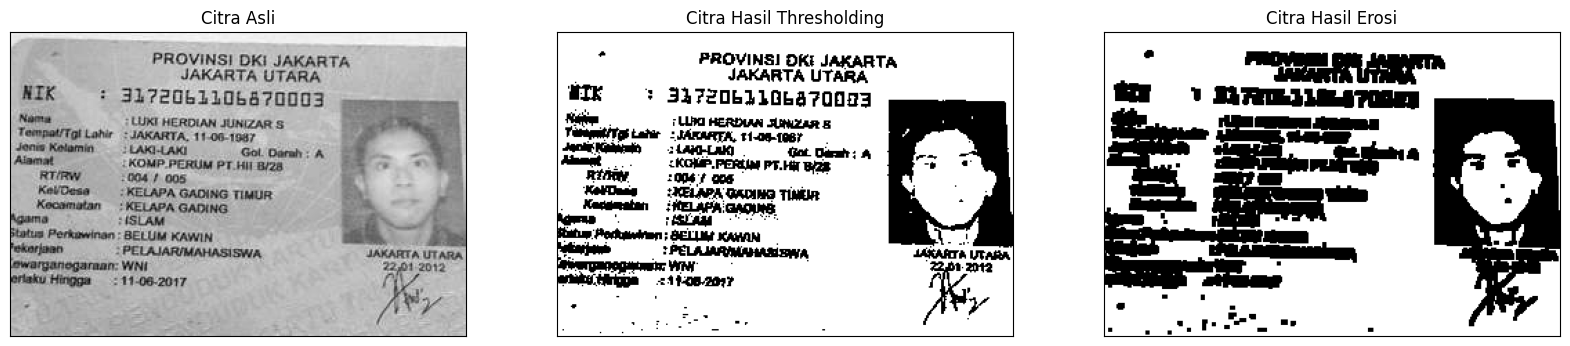

In [48]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP/gambar6.jpeg', 0)

# Melakukan thresholding
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(thresh, cmap='gray')
plt.title('Citra Hasil Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(eroded, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])

plt.show()

# **Top hat & Black Hat**

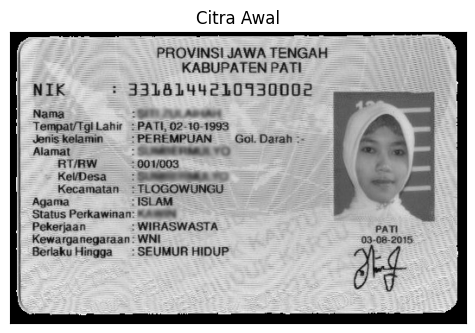

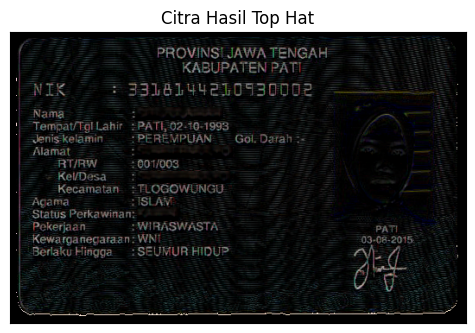

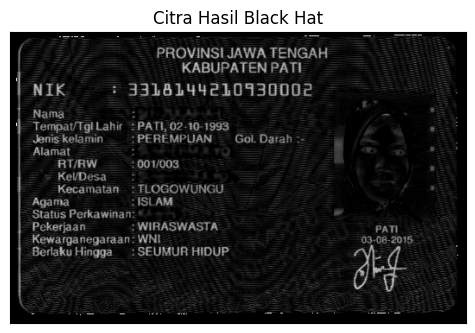

In [49]:
filterSize =(3, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP/gambar3.png')
input_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP/gambar3.png')
input_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat_img = cv2.morphologyEx(input_image2, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)

plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(input_image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil Top Hat'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,16)),plt.subplot(132),plt.imshow(blackhat_img,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

# **Dilasi**

[[1]
 [1]]


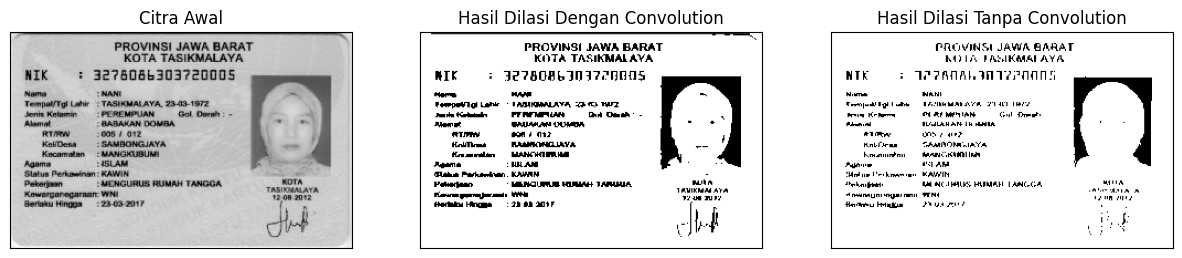

In [50]:
def conv2d(image, kernel, stride):

  height, width = image.shape[0], image.shape[1]
  kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]

  start = int(kernel_width/2)

  image_result = np.copy(image)

  for y in range(start, height - start, stride):
    for x in range(start, width - start, stride):
      value = 0

      for ky in range(kernel_height):
        for kx in range(kernel_width):
          i = y - start + ky
          j = x - start + kx

          value += image[i, j] * kernel[ky, kx]

      image_result[y, x] = np.clip(value, 0, 255)

    return image_result

def Brightness (image, brightness):
  brightness_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        brightness_image[y,x,c] = np.clip(image[y,x,c] + brightness, 0, 255)

  return brightness_image

kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]], dtype = np.float32)

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP/gambar4.PNG')

kernel_lsed = np.array([[1, 0, -1],
                          [2, 0, -3],
                          [1, 0, -2]], dtype=np.float32)

# cv2_imshow
result = conv2d(img, kernel_lsed,1)
brightness = Brightness(result, -35)

input = cv2.cvtColor(brightness, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)


input2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY)
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2,kernel2,iterations = 1)

print(kernel)
plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Hasil Dilasi Dengan Convolution')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Hasil Dilasi Tanpa Convolution')
plt.xticks([]), plt.yticks([])
plt.show()

# **Opening**

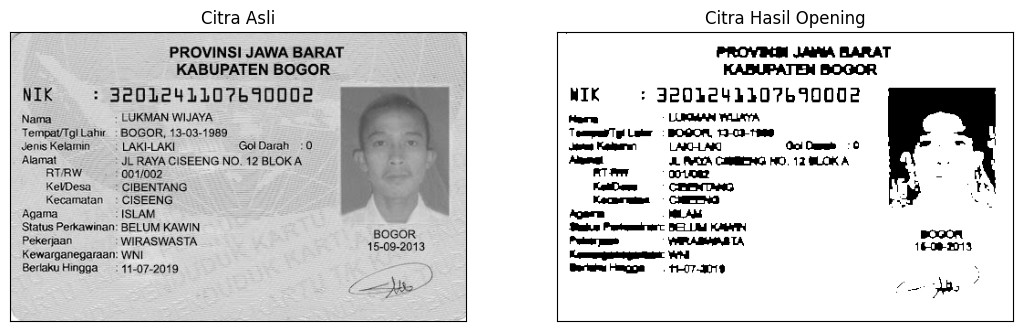

In [51]:
image_path = '/content/drive/MyDrive/PCVK/Images/KTP/gambar8.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

ret, threshold = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
image_opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20, 16))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Asli'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

# **Skeleton**

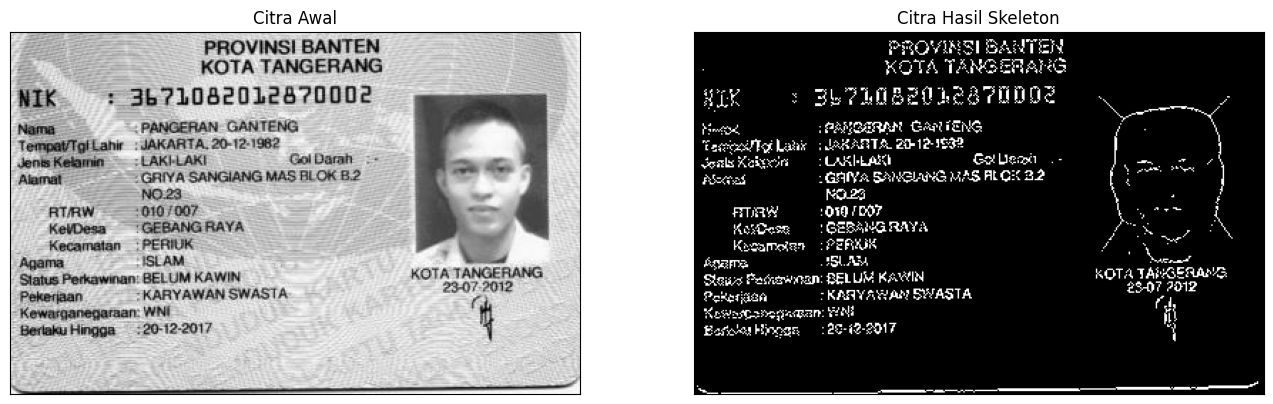

In [52]:
import cv2
import numpy as np
from IPython.display import Image, display

# Membaca citra KTP
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP/gambar1.jpg', cv2.IMREAD_GRAYSCALE)

# Binerisasi citra
ret, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Membalik citra biner
binary_image = cv2.bitwise_not(binary_image)

# Menjalankan skeletonization
def skeletonize(image):
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)

    ret, image = cv2.threshold(image, 127, 255, 0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(image, temp)
        skel = cv2.bitwise_or(skel, temp)
        image = eroded.copy()

        zeros = size - cv2.countNonZero(image)
        if zeros == size:
            done = True

    return skel

skeletonized_image = skeletonize(binary_image)

plt.figure(figsize=(25,25))

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(skeletonized_image,cmap = 'gray')
plt.title('Citra Hasil Skeleton'), plt.xticks([]), plt.yticks([])
plt.show()